# Contributors to this notebook

* Daniel Arribas-Bel [@darribas](http://twitter.com/darribas)
* Serge Rey http://sjrey.org

In [1]:
%matplotlib inline
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
from matplotlib.pyplot import *

# Exploratory Spatial Data Analysis (ESDA)

## Global spatial autocorrelation

Most spatial data are spatially autocorrelated:

* [First law of geography:](http://en.wikipedia.org/wiki/Tobler's_first_law_of_geography)

*"Everything is related to everything else, but near things are more related than distant things"*

W. Tobler

* M. Goodchild: *"Only Hell is spatially random"*

### Positive spatial autocorrelation

In [2]:
yp = np.arange(25)
yp.shape = (5, 5)
yp

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

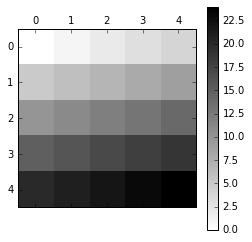

In [3]:
matshow(yp, cmap=cm.gray_r)
colorbar()

### Perfect negative spatial autocorrelation

In [4]:
yn = np.zeros((25,))
ids = range(0,25,2)
yn[ids] = 1
yn.shape = (5,5)

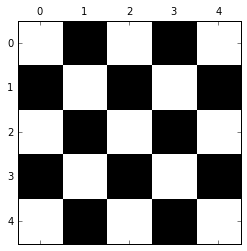

In [5]:
matshow(yn, cmap=cm.gray)

### Spatial randomness

In [6]:
yr = np.arange(25)
#Shuffle the data randomly
np.random.shuffle(yr)
yr.shape = (5, 5)
yr

array([[14, 17,  4, 21, 10],
       [ 1,  3,  9, 12,  7],
       [20,  0, 23, 15, 11],
       [ 2, 18, 13,  6, 22],
       [24, 19,  5,  8, 16]])

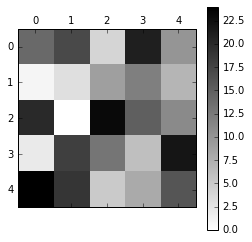

In [7]:
matshow(yr, cmap=cm.gray_r)
colorbar()

### Moran's I

This is the most commonly used statistic to test spatial autocorrelation (randomness rather) in continuous data.

In [8]:
w = ps.lat2W(5, 5)

In [9]:
mr = ps.Moran(yr.flatten(), w)

In [10]:
mr.I

-0.24346153846153845

In [11]:
mr.p_norm

0.17921535500967212

In [12]:
mr.p_sim

0.097000000000000003

In [13]:
# Simulated random values
mr.sim

array([  3.91025641e-02,   2.69871795e-02,  -1.65448718e-01,
         1.00512821e-01,   7.60256410e-02,   8.91025641e-03,
         4.12820513e-02,  -1.50641026e-01,  -3.52564103e-02,
         3.14615385e-01,   2.02564103e-02,   8.04487179e-02,
        -1.22500000e-01,  -2.62820513e-02,  -3.90256410e-01,
        -2.98141026e-01,  -2.64679487e-01,  -2.28525641e-01,
         1.02435897e-01,  -2.60576923e-01,   8.68589744e-02,
         1.40512821e-01,  -8.38461538e-02,  -1.49294872e-01,
         1.54102564e-01,   4.33333333e-02,  -2.46410256e-01,
         3.00000000e-02,   1.10769231e-01,   1.84935897e-01,
        -1.39871795e-01,  -5.21153846e-02,   6.29487179e-02,
         1.81410256e-01,   1.19487179e-01,  -2.11538462e-02,
         1.20897436e-01,  -1.38076923e-01,  -1.58012821e-01,
         1.78141026e-01,   4.84615385e-02,  -6.72435897e-02,
        -4.29487179e-03,  -7.48076923e-02,   2.28076923e-01,
        -5.66666667e-02,  -1.32115385e-01,   1.69230769e-01,
         1.75641026e-02,

We can plot the empirical inference easily using `pandas` and a bit of `matplotlib`:

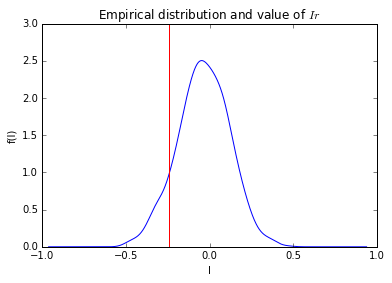

In [14]:
srv = pd.Series(mr.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mr.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $Ir$')


Moran's I value is: 0.8400


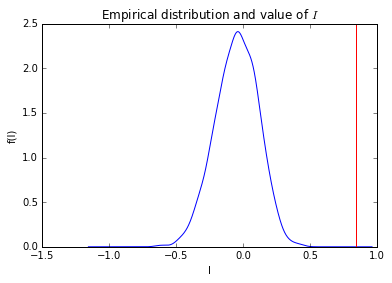

In [15]:
mp = ps.Moran(yp.flatten(), w)
srv = pd.Series(mp.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mp.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $I$')
print("")
print("Moran's I value is: %.4f"%mp.I)


Moran's I value is: -1.0000


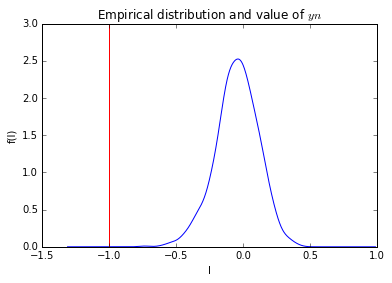

In [16]:
mn = ps.Moran(yn.flatten(), w)
srv = pd.Series(mn.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mn.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $yn$')
print("")
print("Moran's I value is: %.4f"%mn.I)

Now let's try Moran's I on the Amsterdam checkin data. Note that because we have already created the weights (see the notebook `PySAL_weights` in the same folder), we can simply load them.

In [17]:
w = ps.open('data/adam.gal').read()
w.transform = 'R'
w

Island id:  ['27']


Let's try it on the total volume of checkins by neighborhood:

In [18]:
total = np.array(ps.open('data/amsterdam_hoods.dbf').by_col('total'))


Moran's I value is: 0.3748


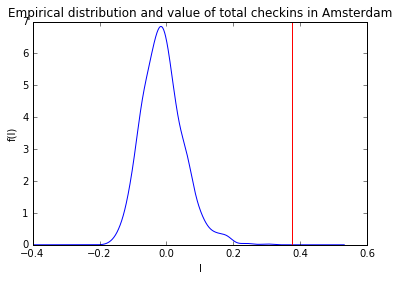

In [19]:
mi_adam = ps.Moran(total, w)
srv = pd.Series(mi_adam.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mi_adam.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of total checkins in Amsterdam')
print("")
print("Moran's I value is: %.4f"%mi_adam.I)

### Scatter plot

One way to graphically display and understand Moran's I is through the so called `scatter plot`, that represents the values of `y` against their spatially lagged values (`wy`). This is straightforward to plot with `matplotlib`. An interesting addition is to include a fitted line, whose slope corresponds to Moran's I.

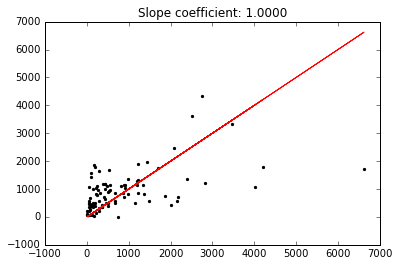

In [20]:
w_total = ps.lag_spatial(w, total)
scatter(total, w_total, marker='.', s=20, alpha=1, color='k')
fit = ps.spreg.OLS(total[:, None], total[:, None])
plot(total[:, None], fit.predy, color='r')
title("Slope coefficient: %.4f"%fit.betas[1])

In [21]:
mi_adam.I

0.37484886591924182

#### On your own

Try to explore the change of spatial autocorrelation in the volume of checkins over the different hours of the day.

## Local spatial autocorrelation

[Anselin, 1995. *Local Indicators of Spatial Association*](http://onlinelibrary.wiley.com/doi/10.1111/j.1538-4632.1995.tb00338.x/abstract)

In [22]:
from pysal.contrib.viz import mapping as viz

In [23]:
lisa_total = ps.Moran_Local(total, w)

In [24]:
lisa_total.Is

array([  6.00928348e+00,   4.61049219e+00,   4.21625690e+00,
         5.85778358e+00,   1.85434314e+00,   6.28629394e-01,
         7.82059246e-01,   2.91992050e+00,   3.79614269e-01,
         9.00362375e-02,  -3.15884500e-02,  -3.87707864e-01,
        -1.46755548e-01,   2.16206112e-02,   1.51768095e-01,
         5.85137017e-02,  -3.55651247e-03,  -2.00495239e-02,
         2.53094637e-01,   2.65744884e-02,  -3.85914527e-01,
         1.07817032e-01,  -2.00100954e-01,  -1.28315718e-01,
        -1.24848021e-01,  -2.85310661e-01,  -1.20589376e-01,
        -0.00000000e+00,   3.46222202e-01,  -1.81243281e-01,
         3.83573127e-02,   2.27087403e-01,   9.07483942e-02,
         2.19138381e-01,   2.63422429e-01,   2.56582190e-01,
         2.01213118e-01,  -4.74572686e-01,  -5.88628830e-01,
         5.08278164e-01,   4.97589107e-01,   4.93393442e-01,
         3.06105138e-01,   2.22173819e-01,   4.87447098e-01,
         4.91732036e-01,   4.35930530e-01,   3.49562356e-01,
         1.14567123e-01,

In [25]:
lisa_total.p_sim

array([ 0.004,  0.003,  0.001,  0.001,  0.001,  0.006,  0.076,  0.005,
        0.011,  0.12 ,  0.302,  0.168,  0.232,  0.358,  0.215,  0.415,
        0.448,  0.387,  0.211,  0.323,  0.069,  0.139,  0.056,  0.203,
        0.267,  0.279,  0.263,  0.001,  0.247,  0.233,  0.228,  0.211,
        0.217,  0.039,  0.118,  0.099,  0.176,  0.051,  0.026,  0.006,
        0.044,  0.001,  0.182,  0.315,  0.004,  0.002,  0.001,  0.049,
        0.17 ,  0.261,  0.292,  0.246,  0.476,  0.063,  0.001,  0.009,
        0.017,  0.291,  0.163,  0.122,  0.17 ,  0.305,  0.119,  0.405,
        0.397,  0.22 ,  0.153,  0.392,  0.292,  0.218,  0.442,  0.29 ,
        0.102,  0.347,  0.178,  0.179,  0.464,  0.329,  0.15 ,  0.379,
        0.039,  0.26 ,  0.315,  0.485,  0.404,  0.307,  0.121,  0.44 ,
        0.213,  0.066,  0.405,  0.253,  0.231,  0.232,  0.497,  0.231])

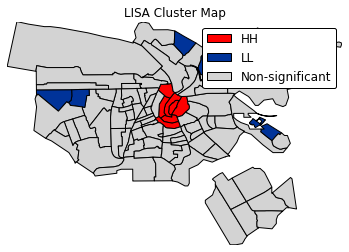

In [26]:
hoods = "data/amsterdam_hoods.shp"
viz.plot_lisa_cluster(hoods, lisa_total, title="LISA Cluster Map")